In [1]:
import pandas as pd
import datetime

import sys, os
sys.path.append(os.path.join(os.path.dirname('.'), '..', 'lib'))
sys.path.insert(0, '/Users/chris/programming/interactivebrokers')
import ib_api_cm as ib_api

import importlib
importlib.reload(ib_api)
import ib_api_cm as ib_api

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style()

In [2]:
# After execution, TWS will prompt you to accept the connection
# The ERROR simply confirms that there is a connection to the market data.
app = ib_api.main(port=7496)

serverVersion:155 connectionTime:b'20200315 10:24:48 CET'


ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:jfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:eufarm
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:ushmds.nj
ERROR -1 2106 HMDS data farm connection is OK:cashhmds
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [3]:
app.get_total_account_value()

904047.663

In [4]:
# Get the current positions
positions = app.get_positions()
positions

,avgCost,localSymbol,position,secType,symbol
account,,,,,
U1728910,99.54700,EMB,500.0,STK,EMB
U1728910,50.94358,VTEB,2000.0,STK,VTEB
U1728910,1100.37380,SPY 200417P00250000,20.0,OPT,SPY
U1728910,157592.42000,GCJ0,1.0,FUT,GC
U1728910,162507.90000,NQH0,-1.0,FUT,NQ
U1728910,1579.37380,SPY 200417P00265000,10.0,OPT,SPY
U1728910,1.05280,CHF.USD,-374939.0,CASH,CHF
U1728910,46002.38000,VXJ0,4.0,FUT,VIX
U1728910,138760.40000,ESM0,-1.0,FUT,ES


In [5]:
end = datetime.datetime.today() - datetime.timedelta(days=1)
start = datetime.datetime.today() - datetime.timedelta(days=21)
bar_size = '1 day'  # day, 
rth = True          # If True, return data only in Regular Trading Hours (RTH)

contract = app.get_contract('ESM0')
contract = app.get_contract('VXJ0')
#contract.exchange = 'SMART'
bars = app.get_price_history(contracts=contract, start=start, 
                             end=end, rth=rth, bar_size=bar_size )
bars.tail(10)

VXJ0                                    
           open_price   high    low close_price    volume
2020-03-02      23.15  24.20  22.85       23.40   70315.0
2020-03-03      23.15  25.80  22.45       25.50   91088.0
2020-03-04      24.55  25.20  24.00       24.65   41716.0
2020-03-05      26.20  28.45  25.75       27.50   78726.0
2020-03-06      32.20  33.05  29.95       30.30  102141.0
2020-03-09      39.75  40.60  35.25       36.25   73372.0
2020-03-10      33.20  37.40  33.05       34.80   68521.0
2020-03-11      37.15  39.90  36.75       38.60   68338.0
2020-03-12      45.60  49.60  42.00       45.85  117376.0
2020-03-13      42.40  49.30  40.00       43.85  101277.0

In [6]:
tickers = ["SPY", "VXX", "EMB", "VTEB"]
contracts = app.get_contracts(tickers)
app.get_quotes(contracts)

SPY     267.45
VXX      44.51
EMB     100.36
VTEB     52.34
dtype: float64

In [8]:
tickers = ["SPY", "EMB", "VTEB"]
contracts = app.get_contracts(tickers)

end = datetime.date.today()
start = end - datetime.timedelta(days=63)

bars = app.get_price_history(contracts, rth=False, start=start, end=end)
bars.tail(10)

SPY                                               EMB  \
           open_price    high     low close_price     volume open_price   
2020-03-02     300.20  309.63  290.65      309.40  1807189.0     113.14   
2020-03-03     308.71  313.84  297.57      302.17  2271933.0     114.93   
2020-03-04     304.99  313.10  300.24      310.33  1374065.0     115.94   
2020-03-05     307.72  313.09  300.01      302.68  1434127.0     115.63   
2020-03-06     298.71  302.80  290.23      295.50  1861156.0     115.41   
2020-03-09     280.20  289.40  270.27      280.25  2301959.0     111.27   
2020-03-10     281.96  288.83  273.50      283.14  2074169.0     111.25   
2020-03-11     281.30  288.42  270.88      273.90  1833269.0     106.50   
2020-03-12     263.95  267.41  242.00      244.85  3060126.0     100.00   
2020-03-13     257.99  272.10  245.00      267.45  2504098.0     100.00   

                                                       VTEB                \
              high     low close_price    volume open_price   high    low   
2020-03-02  114.94  113.14      114.56   95320.0      54.91  54.98  54.75   
2020-03-03  116.49  114.82      115.95   77649.0      54.92  54.97  54.82   
2020-03-04  117.08  115.93      116.81   47926.0      54.89  54.95  54.85   
2020-03-05  116.23  115.46      115.78   43863.0      54.98  54.98  54.85   
2020-03-06  115.41  114.34      115.28   67943.0      55.02  55.06  54.54   
2020-03-09  111.27  105.92      106.50   89857.0      56.00  56.00  55.01   
2020-03-10  111.25  106.86      107.27  103023.0      55.05  55.14  54.59   
2020-03-11  107.20  102.04      104.87  121494.0      54.84  54.84  53.37   
2020-03-12  102.26   95.00       97.30  104600.0      53.00  53.14  50.51   
2020-03-13  101.75   97.94      100.36   88080.0      51.48  52.50  51.48   

                                 
           close_price   volume  
2020-03-02       54.85  12000.0  
2020-03-03       54.90   8217.0  
2020-03-04       54.89   6520.0  
2020-03-05       54.90   5248.0  
2020-03-06       54.54   9185.0  
2020-03-09       55.19  13414.0  
2020-03-10       54.63  10878.0  
2020-03-11       53.85  15936.0  
2020-03-12       50.70  43853.0  
2020-03-13       52.34  66655.0

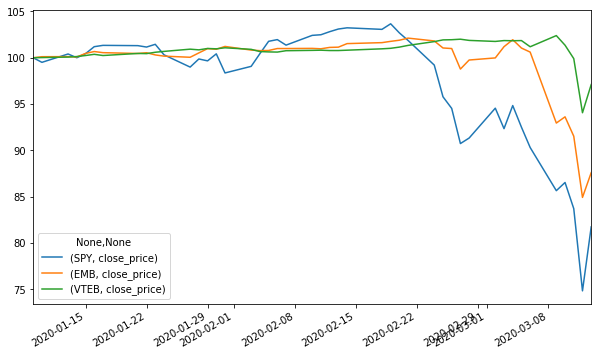

In [9]:
close_prc = bars.loc[:, (slice(None), 'close_price')]
ind_ts = close_prc / close_prc.iloc[0] * 100
ax = ind_ts.plot(figsize=(10,6))

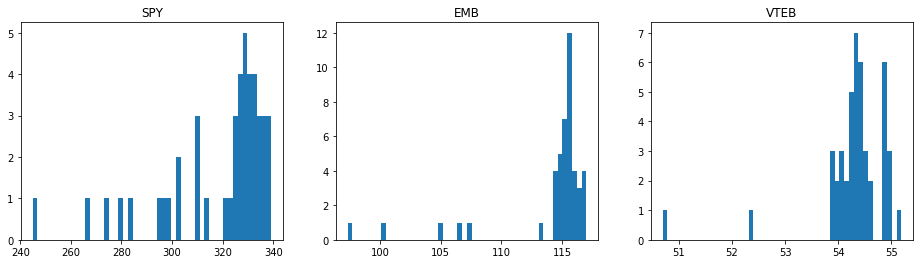

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for i, sym in enumerate(bars.columns.get_level_values(0).unique()):
    ax[i].hist(bars.loc[:, (sym, 'close_price')], bins=50)
    ax[i].set_title(sym)

In [11]:
app.get_contract("AAPL").__dict__

{'conId': 265598,
 'symbol': 'AAPL',
 'secType': 'STK',
 'lastTradeDateOrContractMonth': '',
 'strike': 0.0,
 'right': '',
 'multiplier': '',
 'exchange': 'SMART',
 'primaryExchange': 'NASDAQ',
 'currency': 'USD',
 'localSymbol': 'AAPL',
 'tradingClass': 'NMS',
 'includeExpired': False,
 'secIdType': '',
 'secId': '',
 'comboLegsDescrip': '',
 'comboLegs': None,
 'deltaNeutralContract': None}

In [16]:
bracket_order = {
    'localSymbol': "AAPL",
    'instruction': "BUY",
    'price': 150.,
    'quantity': 1,
    'outside_rth': False,
    'tif': "DAY",
    'profit_price': 160,
    'stop_price': 145
}
app.create_bracket_orders(bracket_order)
#app.place_all_orders()
app._saved_orders

{13: {'order': 112010380120: 13,0,0: LMT BUY 1@150.000000 DAY,
  'contract': 112005851176: 265598,AAPL,STK,,0.0,,,SMART,NASDAQ,USD,AAPL,NMS,False,,combo:},
 14: {'order': 112010382696: 14,0,0: LMT SELL 1@160.000000 ,
  'contract': 112005851176: 265598,AAPL,STK,,0.0,,,SMART,NASDAQ,USD,AAPL,NMS,False,,combo:},
 15: {'order': 112010379392: 15,0,0: STP SELL 1@179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000 ,
  'contract': 112005851176: 265598,AAPL,STK,,0.0,,,SMART,NASDAQ,USD,AAPL,NMS,False,,combo:}}